In [2]:
import numpy as np

In [122]:
class LogisticRegression(object):
    def __init__(self,learning_rate=0.1,max_iter=100,seed=None):
        self.seed=seed
        self.lr=learning_rate
        self.max_iter=max_iter
    
    def fit(self,x,y):
        np.random.seed(self.seed)
        self.w=np.random.normal(loc=0.0,scale=1.0,size=x.shape[1])
        self.b=np.random.normal(loc=0.0,scale=1.0)
        self.x=x
        self.y=y
        for i in range(self.max_iter):
            self._update_step()
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def _f(self,x,w,b):
        z=x.dot(w) + b
        return self._sigmoid(z)
    
    def predict_proba(self,x=None):
        if x is None:
            x=self.x
        y_pred=self._f(x,self.w,self.b)
        return y_pred
    
    def predict(self,x=None):
        if x is None:
            x=self.x
        y_pred_proba=self._f(x,self.w,self.b)
        y_pred=np.array([0 if y_pred_proba[i]<0.5 else 1 for i in range(len(y_pred_proba))])
        return y_pred
    
    def score(self, y_true=None, y_pred=None):
        if y_true is None or y_pred is None:
            y_true=self.y
            y_pred=self.predict()
        acc=np.mean([1 if y_true[i]==y_pred[i] else 0 for i in range(len(y_true))])
        return acc
    
    def loss(self,y_true=None,y_pred_proba=None):
        if y_true is None or y_pred is None:
            y_true=self.y
            y_pred_proba=self.predict_proba()
        
        return np.mean(-1.0*(y_true*np.log(y_proba)+(1.0-y_true)*np.log(1.0-y_pred_proba)))
    
    def _cal_gradient(self):
        y_pred=self.predict()
        d_w=(y_pred-self.y).dot(self.x)/len(self.y)
        d_b=np.mean(y_pred-self.y)
        return d_w,d_b
    
    def _update_step(self):
        d_w,d_b=self._cal_gradient()
        self.w=self.w-self.lr*d_w
        self.b=self.b-self.lr*d_b

In [114]:
def generate_data(seed):
    np.random.seed(seed)
    data_size_1=300
    x1_1=np.random.normal(loc=5.0,scale=1.0,size=data_size_1)
    x2_1=np.random.normal(loc=4.0,scale=1.0,size=data_size_1)
    y_1=[0 for _ in range(data_size_1)]
    
    data_size_2=400
    x1_2=np.random.normal(loc=10.0,scale=2.0,size=data_size_2)
    x2_2=np.random.normal(loc=8.0,scale=2.0,size=data_size_2)
    y_2=[1 for _ in range(data_size_2)]
    
    x1=np.concatenate((x1_1,x1_2),axis=0)
    x2=np.concatenate((x2_1,x2_2),axis=0)
    x=np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
    y=np.concatenate((y_1,y_2),axis=0)
    
    data_size_all=data_size_1 + data_size_2
    shuffled_index=np.random.permutation(data_size_all)
    x=x[shuffled_index]
    y=y[shuffled_index]
    return x,y

In [115]:
def train_test_split(x,y):
    splite_index=int(len(y)*0.7)
    x_train=x[:splite_index]
    y_train=y[:splite_index]
    
    x_test=x[splite_index:]
    y_test=y[splite_index:]
    
    return x_train,y_train,x_test,y_test

In [116]:
import matplotlib.pyplot as plt

In [117]:
x,y=generate_data(seed=272)
x_train,y_train,x_test,y_test = train_test_split(x,y)

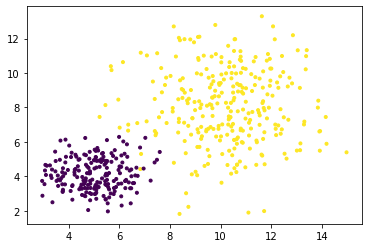

In [118]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.')
plt.show()

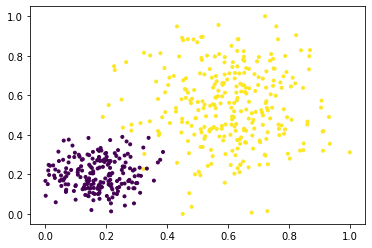

In [119]:
x_train=(x_train-np.min(x_train,axis=0))/(np.max(x_train,axis=0)-np.min(x_train,axis=0))
x_test=(x_test-np.min(x_test,axis=0))/(np.max(x_test,axis=0)-np.min(x_test,axis=0))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.')
plt.show()

In [124]:
clf=LogisticRegression(learning_rate=0.1,max_iter=500,seed=272)

In [136]:
#w=np.random.normal(loc=0.0,scale=1.0,size=x_train.shape[1])
#x_train.shape,w.shape,w,x_train
clf.fit(x_train,y_train)

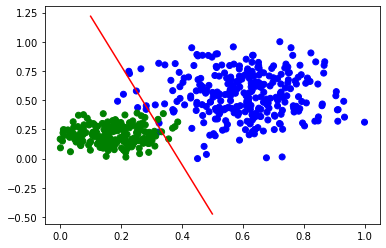

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [137]:
#W0W0+W1X1+b=0, X1=(-b-W0X0)/W1
split_boundary_func=lambda x:(-clf.b-clf.w[0]*x)/clf.w[1]
xx=np.arange(0.1,0.6,0.1)
cValue=['g','b']
#xcatter(x,y,)
plt.scatter(x_train[:,0],x_train[:,1],c=[cValue[i] for i in y_train], marker='o')
plt.plot(xx,split_boundary_func(xx),c='red')
plt.show()